<a href="https://colab.research.google.com/github/airbytehq/quickstarts/blob/master/pyairbyte_notebooks/PyAirbyte_Basic_Features_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PyAirbyte Demo

Below is a pre-release demo of PyAirbyte.


## Install PyAirbyte


In [ ]:
# Add virtual environment support for running in Google Colab
!apt-get install -qq python3.10-venv

# Install PyAirbyte
%pip install --quiet airbyte

## Locating your Data Source

To see what data sources are available, you can check [our docs](https://docs.airbyte.com/using-airbyte/airbyte-lib/getting-started) or run the following:


In [ ]:
# Import PyAirbyte
import airbyte as ab

# Show all available connectors
ab.get_available_connectors()

## Load the Source Data using PyAirbyte


Create and install a source connector:


In [4]:
import airbyte as ab

# Create and install the source:
source: ab.Source = ab.get_source("source-faker")

Installing 'source-faker' into virtual environment '/content/.venv-source-faker'.
Running 'pip install airbyte-source-faker'...

Connector 'source-faker' installed successfully!
For more information, see the source-faker documentation:
https://docs.airbyte.com/integrations/sources/faker#reference

In [5]:
# Configure the source
source.set_config(
    config={
        "count": 50_000,  # Adjust this to get a larger or smaller dataset
        "seed": 123,
    },
)
# Verify the config and creds by running `check`:
source.check()

Connection check succeeded for `source-faker`.

## Read Data from the PyAirbyte Cache

Once data is read, we can do anything we want to with the resulting streams. This includes `to_pandas()` which registers a Pandas dataframe and `to_sql_table()` which gives us a SQLAlchemy `Table` boject, which we can use to run SQL queries.


In [6]:
# Select all of the source's streams and read data into the internal cache:
source.select_all_streams()
read_result: ab.ReadResult = source.read()

## Read Progress

Started reading at 20:10:41.

Read **100,100** records over **1min 17s** (1,300.0 records / second).

Wrote **100,100** records over 11 batches.

Finished reading at 20:11:59.

Started finalizing streams at 20:11:59.

Finalized **11** batches over 1 seconds.

Completed 3 out of 3 streams:

  - users
  - purchases
  - products


Completed writing at 20:12:01. Total time elapsed: 1min 19s


------------------------------------------------


Completed `source-faker` read operation at 20:12:01.

In [7]:
# Display or transform the loaded data
products_df = read_result["products"].to_pandas()
display(products_df)

,id,make,model,year,price,created_at,updated_at
0,1,Mazda,MX-5,2008,2869.0,2022-02-01 17:02:19,2024-02-12 20:10:42
1,2,Mercedes-Benz,C-Class,2009,42397.0,2021-01-25 14:31:33,2024-02-12 20:10:42
2,3,Honda,Accord Crosstour,2011,63293.0,2021-02-11 05:36:03,2024-02-12 20:10:42
3,4,GMC,Jimmy,1998,34079.0,2022-01-24 03:00:03,2024-02-12 20:10:42
4,5,Infiniti,FX,2004,17036.0,2021-10-02 03:55:44,2024-02-12 20:10:42
...,...,...,...,...,...,...,...
95,96,BMW,330,2006,14494.0,2021-09-17 20:52:48,2024-02-12 20:10:42
96,97,Audi,R8,2008,17642.0,2021-09-21 11:56:24,2024-02-12 20:10:42
97,98,Cadillac,CTS-V,2007,19914.0,2021-09-02 15:38:46,2024-02-12 20:10:42
98,99,GMC,1500 Club Coupe,1997,82288.0,2021-04-20 18:58:15,2024-02-12 20:10:42


## Creating graphs

PyAirbyte integrates with Pandas, which integrates with `matplotlib` as well as many other popular libraries. We can use this as a means of quickly creating graphs.


/usr/local/lib/python3.10/dist-packages/duckdb_engine/__init__.py:178: DuckDBEngineWarning: duckdb-engine doesn't yet support reflection on indices
  warnings.warn(


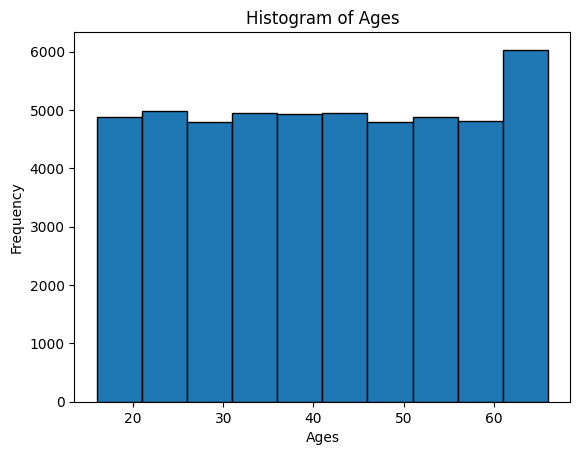

In [8]:
%pip install matplotlib

import matplotlib.pyplot as plt

users_df = read_result["users"].to_pandas()

plt.hist(users_df["age"], bins=10, edgecolor="black")
plt.title("Histogram of Ages")
plt.xlabel("Ages")
plt.ylabel("Frequency")
plt.show()

## Working in SQL

Since data is cached in a local DuckDB database, we can query the data with SQL.

We can do this in multiple ways. One way is to use the [JupySQL Extension](https://jupysql.ploomber.io/en/latest/user-guide/template.html), which we'll use below.


In [9]:
# Install JupySQL to enable SQL cell magics
%pip install --quiet jupysql
# Load JupySQL extension
%load_ext sql
# Configure max row limit (optional)
%config SqlMagic.displaylimit = 200

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.7/95.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 5.2 MB/s eta 0:00:00
Deploy Panel apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


In [10]:
# Get the SQLAlchemy 'engine' object for the cache
engine = read_result.cache.get_sql_engine()
# Pass the engine to JupySQL
%sql engine

In [14]:
# Get table objects for the 'users' and 'purchases' streams
users_table = read_result.cache["users"].to_sql_table()
purchases_table = read_result.cache["purchases"].to_sql_table()
display([users_table.fullname, purchases_table.fullname])

['main.users', 'main.purchases']

In [18]:
%%sql
# Show most recent purchases by purchase date:
SELECT users.id, users.name, purchases.product_id, purchases.purchased_at
FROM {{ users_table.fullname }} AS users
JOIN {{ purchases_table.fullname }} AS purchases
ON users.id = purchases.user_id
ORDER BY purchases.purchased_at DESC
LIMIT 10

Running query in 'duckdb:///.cache/default_cache_db.duckdb'

id,name,product_id,purchased_at
21589,Torie,48,2024-12-10 20:32:08
39842,Kareen,45,2024-11-28 11:26:13
19248,Jerry,41,2024-11-05 00:59:42
30780,Dwana,82,2024-10-20 20:09:11
4669,Frankie,100,2024-10-15 16:23:02
42204,Lashaun,9,2024-10-06 08:06:59
13251,Charlie,46,2024-09-19 17:55:52
47798,Issac,40,2024-09-13 05:13:17
34970,Eleni,39,2024-09-13 00:15:55
24782,Jose,40,2024-09-08 09:49:06


In [19]:
# Show tables for the other streams
%sqlcmd tables

Name
products
purchases
users
_PyAirbyte_state
_PyAirbyte_streams
